# TASK 2 
**Requirements**
1. Implement three DT models by the split criteria of Information Gain, Gain Ratio and Gini Index. You can use either binary-split or multiple-split.
2. Use ~60% data as training data and ~40% as test data
3. It is recommended that your implementation includes a “tree induction function”, a “classification function” and other functions (which are up to you).
4. After implementing the three DT models, use a simple ensemble method to build a new classifier. This new classifier just utilises a voting function on the prediction outcomes of the three DT models.
5. Present clear and accurate explanation of your implementation and results (in the Markdown format). In particular, report the accuracy of the models, and report whether an improvement the ensemble method can achieve.
<div class="alert alert-warning">
<p>Note. You can (but not must) use any suitable pre-processing method. You also can (but not must) use any reasonable early stopping criteria (pre-pruned parameters such as number of splits, minimum data set size, and split threshold) to improve the training speed. If you do so, you must explain the criteria clearly</p>
</div>

**Data Set infromation**
<div class="alert alert-info">  
  <strong>Attribute Information</strong>
    <table>
   <tr>
    <th>Column Name</th>
    <th>Unique Values</th>
  </tr>
        <tr>
            <td>parents</td>
            <td> usual, pretentious, great_pret</td>
        </tr>
  <tr>
    <td>has_nurs</td>
    <td>proper, less_proper, improper, critical, very_crit</td>
  </tr>
  <tr>
    <td>form</td>
    <td>complete, completed, incomplete, foster</td>
  </tr>
  <tr>
    <td>children</td>
    <td>1, 2, 3, more</td>
  </tr>
  <tr>
    <td>housing</td>
    <td>convenient, less_conv, critical</td>
  </tr>
  <tr>
    <td>finance</td>
    <td>non-prob, slightly_prob, problematic</td>
  </tr>
   <tr>
    <td>social</td>
    <td>nonprob, slightly_prob, problematic</td>
  </tr>
  <tr>
    <td>health <strong>Target</strong></td>
    <td>recommended, priority, not_recom</td>
  </tr>
   <tr>
    <td>final evaluation</td>
    <td>recommend,priority, not_recom, very_recom, spec_prior</td>
  </tr>
</table>
    <br>
<strong>Data Set Information:</strong>
<p>Nursery Database was derived from a hierarchical decision model originally developed to rank applications
for nursery schools. There are 8 attributes and 1 target variable, all of which are categorical.<strong> The last target
variable (i.e., the application ranking) includes 5 classes: “not_recom”, “recommend”, “very_recom”, “priority”
and “spec_prior”.</strong></p>
    
<table>
  <tr>
    <th>Data Set Characteristics: </th>
    <th>Attribute Characteristics:</th>
    <th>Associated Tasks:</th>
    <th>Number of Instances:</th>
    <th>Number of Attributes:</th>
    <th>Missing Values?</th>
    <th>Area:</th>
    <th>Date Donated</th>
    <th>Number of Web Hits</th>
  </tr>
  <tr>
    <td>Multivariate</td>
    <td>Categorical</td>
    <td>Classification</td>
    <td>12960</td>
    <td>8</td>
    <td>No</td>
    <td>Social</td>
    <td>1997-06-01</td>
    <td>245433</td>

  </tr>
</table>
<p>
<a href="https://archive.ics.uci.edu/ml/datasets/nursery" target="_blank"><strong>Link for dataset</strong></a>
    </p>
    <br>
<strong>Objective</strong>
<p>The objective of this task is to implement from scratch a Decision Tree (DT) classifier to predict whether the
application ranking. You cannot use any ML library for this task.</p>
</div>

In [3]:
import pandas as pd
import numpy as np

In [4]:
# read data file into pandas DataFrame
header_list = ["parents",'has_nurs',"form","children","housing","finance",'social',
               "health",'final evaluation']
data = pd.read_csv('nursery.data',delimiter=",",names=header_list)

In [5]:
data.head()

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   parents           12960 non-null  object
 1   has_nurs          12960 non-null  object
 2   form              12960 non-null  object
 3   children          12960 non-null  object
 4   housing           12960 non-null  object
 5   finance           12960 non-null  object
 6   social            12960 non-null  object
 7   health            12960 non-null  object
 8   final evaluation  12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [7]:
#check for duplicates
print(data.shape)
print(data.duplicated().sum())

(12960, 9)
0


**Conclusion**

1. Dataset Looks Clean
2. No missing values
3. No duplicates
4. All colummns have correct type



### Perncatage and Counts of Unique Values in a Dataset

In [8]:
def check_percentage_value_counts(data):
    for x in data.columns:
        print("|",x.upper(),'|',"\n")
        for i, y in zip(data[x].value_counts().index, data[x].value_counts()):
            value = str(i)
            percentage = round(y/len(data[x]),1)*100
            counts = y
            print(f'{value:15}{percentage}% - {counts}')
        print('\n')

In [9]:
check_percentage_value_counts(data)

| PARENTS | 

usual          30.0% - 4320
pretentious    30.0% - 4320
great_pret     30.0% - 4320


| HAS_NURS | 

proper         20.0% - 2592
less_proper    20.0% - 2592
improper       20.0% - 2592
critical       20.0% - 2592
very_crit      20.0% - 2592


| FORM | 

complete       20.0% - 3240
completed      20.0% - 3240
incomplete     20.0% - 3240
foster         20.0% - 3240


| CHILDREN | 

1              20.0% - 3240
2              20.0% - 3240
3              20.0% - 3240
more           20.0% - 3240


| HOUSING | 

convenient     30.0% - 4320
less_conv      30.0% - 4320
critical       30.0% - 4320


| FINANCE | 

convenient     50.0% - 6480
inconv         50.0% - 6480


| SOCIAL | 

nonprob        30.0% - 4320
slightly_prob  30.0% - 4320
problematic    30.0% - 4320


| HEALTH | 

recommended    30.0% - 4320
priority       30.0% - 4320
not_recom      30.0% - 4320


| FINAL EVALUATION | 

not_recom      30.0% - 4320
priority       30.0% - 4266
spec_prior     30.0% - 4044
very_recom  

**Conclusion**
dataset is very balanced

## Correlation

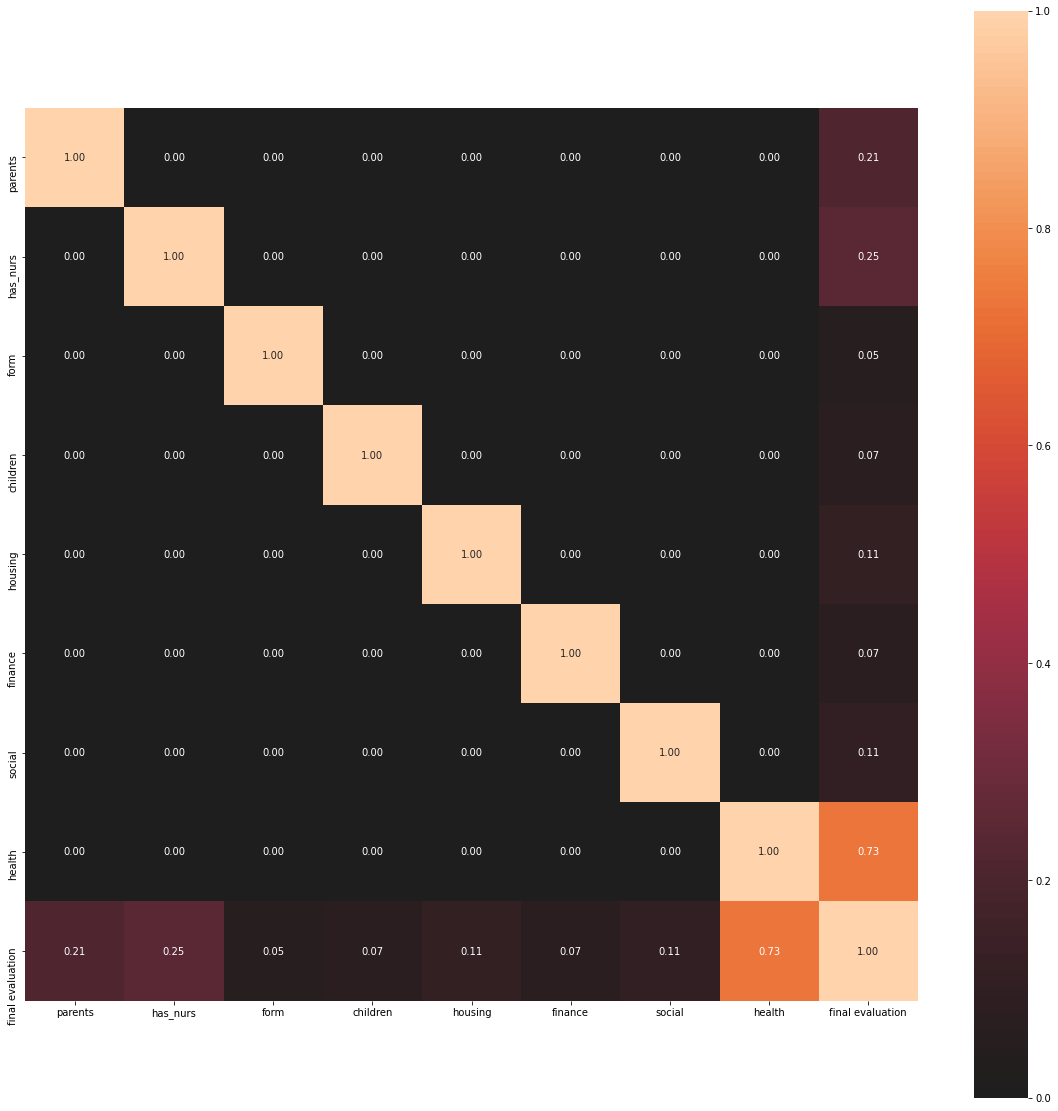

In [10]:
#### Let's check correlation
from dython.nominal import associations
complete_correlation=associations(data, figsize=(20,20))

**Conclusion**

Final Evaluation has very high correlation with health, because of identical values on both columns and it has correlation with has_nurs and parents 

the rest has small correlation compare to those 3 columns **parents, has_nurs and health**

**the smalles** : "form"

# Bulding Decision Tree Model

In [49]:
from math import log
import operator

def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    #the the number of unique elements and their occurance
    for featVec in dataSet: 
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys(): 
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2) #log base 2
    return shannonEnt

    
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]     #chop out axis used for splitting
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet


def chooseBestFeatureToSplit(dataSet,type_im):
    numFeatures = len(dataSet[0]) - 1      #the last column is used for the labels
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    bestGini = 0.0
    bestGain = 0.0
    
    for i in range(numFeatures):        #iterate over all the features
        featList = [example[i] for example in dataSet]#create a list of all the examples of this feature
        uniqueVals = set(featList)       #get a set of unique values
        newEntropy = 0.0
        new_Entropy_Split = 0.0
        NewGini=0.0
        
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet) #Calculate Conditional entropy
            NewGini += prob * (1 - np.square(prob)) #Gini p index
            new_Entropy_Split += ((prob) * log(prob,2)) #calculate SplitInfo
        
        if type_im == 'infoGain':
            infoGain = baseEntropy - newEntropy     #calculate the info gain; ie reduction in entropy
        
            if (infoGain > bestInfoGain):       #compare this to the best gain so far
                bestInfoGain = infoGain         #if better than current best, set to best
                bestFeature = i  
        
        elif type_im == 'gini':
            GiniIndex = 1 - np.sum(np.square(prob))
            multiplie_gini_index = GiniIndex - NewGini
            
            if (multiplie_gini_index < bestGini):       #compare this to the best gini so far
                bestGini = multiplie_gini_index         #if better than current best, set to best
                bestFeature = i
            
        elif type_im == 'GainR':
            infoGain = baseEntropy - newEntropy # INFOGAIN
            
            splitInfo = -new_Entropy_Split #SPLIT INFO
            if (infoGain==0.0 and new_Entropy_Split==0.0): ##ignore if infoGain and new_Entropy_Split = 0 
                GainR = 0
            else:
                GainR = infoGain/splitInfo #GET GAIN RATION
            
            if (GainR > bestGini):       #compare this to the best gain so far
                bestGini = GainR         #if better than current best, set to best
                bestFeature = i
                
    return bestFeature



def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]


def createTree(dataSet,labels,type_im):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList): 
        return classList[0] #stop splitting when all of the classes are equal
    if len(dataSet[0]) == 1: #stop splitting when there are no more features in dataSet
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet,type_im)
    #print(f'bestFeat {bestFeat}')
    bestFeatLabel = labels[bestFeat]
    #print(f'bestFeatLabel: {bestFeatLabel}')
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    #print(f'uniqueVals {uniqueVals}')
    for value in uniqueVals:
        #i=0
        #print(f'i will crash in i+1 : i ={i}')
        #i+=1
        subLabels = labels[:]       #copy all of labels, so trees don't mess up existing labels
        #print(f'subLabels {subLabels}')
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value),subLabels,type_im)
    return myTree      


#it is better to use accuracy 
def classify(inputTree,featLabels,testVec):
    global classLabel
    firstStr=list(inputTree.keys())[0]
    secondDict=inputTree[firstStr]
    featIndex=featLabels.index(firstStr)
    for key in secondDict:
        if testVec[featIndex]==key:
            if type(secondDict[key]).__name__=='dict':
                classify(secondDict[key],featLabels,testVec)
            else:
                classLabel=secondDict[key]
    return classLabel     #returns an integer

#calculate aacuracy
def Classification_DT_Accuracy(myTree,labels,test):
    count = 0
    correct = 0
    incorrect = 0
    total_number_pred = len(test)
    predicted_output =[]
    for i in test:
        output = classify(myTree,labels,i)
        predicted_output.append(output)
        if output==i[-1]:
            correct+=1
        else:
            incorrect+=1
    print(f"Accuracy: {correct/total_number_pred}")
    print(f'Correct: {correct}')
    print(f'Incorrect {incorrect}')
    return predicted_output
    
#_________________________
#Split onn training and testing DF
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

#enseble method
def ensemble(trees,target):
    answer = None #answer of the most frq. value from the row
    correct = 0 #correct answers
    incorrect = 0 #inccorect answers
    most_f_pred = [] #list of the answers
    for i in range(len(trees)-1): 
        List = list(trees.iloc[i]) #convert 1 row to list
        answer = max(set(list(List)), key = List.count) #get most frq. value from the row(list)
        most_f_pred.append(answer) #add to list
        if target['final evaluation'].iloc[i]==answer: 
            correct+=1
        else:
            incorrect+=1
            
    print(f"Accuracy: {correct/(len(target)-1)}")
    print(f'Correct: {correct}')
    print(f'Incorrect {incorrect}')
    return most_f_pred       

# Split on Train and Test

In [53]:
#Splitting on Train and Testing Dataset
train_set, test_set = split_train_test(data, 0.4)
print(f'Train Set {train_set.shape[0]}')
print(f'Testing Set {test_set.shape[0]}\n')
print('TRAIN')
check_percentage_value_counts(train_set[['final evaluation']])
print('TEST')
check_percentage_value_counts(test_set[['final evaluation']])

Train Set 7776
Testing Set 5184

TRAIN
| FINAL EVALUATION | 

not_recom      30.0% - 2590
priority       30.0% - 2575
spec_prior     30.0% - 2407
very_recom     0.0% - 202
recommend      0.0% - 2


TEST
| FINAL EVALUATION | 

not_recom      30.0% - 1730
priority       30.0% - 1691
spec_prior     30.0% - 1637
very_recom     0.0% - 126




# Run the Model

In [54]:
trees_train = pd.DataFrame()
trees_test = pd.DataFrame()
for i in ['infoGain','gini','GainR']:
    test_dataSet = test_set.values.tolist()
    train_dataSet = train_set.values.tolist()
    dataSetCp = train_dataSet.copy()
    #Create Tree with set Split criteria
    myTree = createTree(dataSetCp, list(data.columns),i)
    print('--------------------------')
    print(f'split criteria = {i.upper()}')
    #Predict values
    #TRAIN 
    print('TRAIN')
    list_of_predictions_trained = Classification_DT_Accuracy(myTree,list(data.columns),train_dataSet)
    trees_train[i]=list_of_predictions_trained #add train predictions to DF
    print(f'1st 5 predicted train answers: {list_of_predictions_trained[:5]}')
    print(f'1st 5 original train answers: {train_set["final evaluation"][:5].tolist()}')
    print(f'split criteria = {i.upper()}')
    print('\nTEST')
    #TEST
    list_of_predictions_test = Classification_DT_Accuracy(myTree,list(data.columns),test_dataSet)
    trees_test[i]=list_of_predictions_test #add test predictions to DF
    print(f'1st 5 predicted test answers: {list_of_predictions_test[:5]}')
    print(f'1st 5 original test answers: {test_set["final evaluation"][:5].tolist()}')
    print('\n')
    
print('--------------------------')

--------------------------
split criteria = INFOGAIN
TRAIN
Accuracy: 1.0
Correct: 7776
Incorrect 0
1st 5 predicted train answers: ['priority', 'not_recom', 'not_recom', 'spec_prior', 'priority']
1st 5 original train answers: ['priority', 'not_recom', 'not_recom', 'spec_prior', 'priority']
split criteria = INFOGAIN

TEST
Accuracy: 0.9712577160493827
Correct: 5035
Incorrect 149
1st 5 predicted test answers: ['priority', 'spec_prior', 'not_recom', 'spec_prior', 'priority']
1st 5 original test answers: ['priority', 'priority', 'not_recom', 'spec_prior', 'priority']


--------------------------
split criteria = GINI
TRAIN
Accuracy: 1.0
Correct: 7776
Incorrect 0
1st 5 predicted train answers: ['priority', 'not_recom', 'not_recom', 'spec_prior', 'priority']
1st 5 original train answers: ['priority', 'not_recom', 'not_recom', 'spec_prior', 'priority']
split criteria = GINI

TEST
Accuracy: 0.9513888888888888
Correct: 4932
Incorrect 252
1st 5 predicted test answers: ['priority', 'priority', 'not

**Conclusion**

The best Split Criteria is INFO GAIN it can be seen that the accuracy of it is 97.1
with 149 incorrect answers. the 2nd best Split criteria is GAIN Ratio 96.9 % with 158 incorrect answers

While GINI INDEX HAS 95.1% with 252 incorrect answers

# Ensemble Method "Techniques - Max Voting" commonly used for classification problem

In [56]:
print('Ensemble Method on Train Set')
most_fr_train_pred = ensemble(trees_train,train_set)
print(f'1st 5 most frequient answers from train: {most_fr_train_pred[:5]}')
print(f'1st 5 original train answers: {train_set["final evaluation"][:5].tolist()}')
print('\n')

print('Ensemble Method on Test Set')
most_fr_test_pred = ensemble(trees_test,test_set)
print(f'1st 5 most frequient answers from test: {most_fr_test_pred[:5]}')
print(f'1st 5 original test answers: {test_set["final evaluation"][:5].tolist()}')
print('\n')

Ensemble Method on Train Set
Accuracy: 1.0
Correct: 7775
Incorrect 0
1st 5 most frequient answers from train: ['priority', 'not_recom', 'not_recom', 'spec_prior', 'priority']
1st 5 original train answers: ['priority', 'not_recom', 'not_recom', 'spec_prior', 'priority']


Ensemble Method on Test Set
Accuracy: 0.9724098012733938
Correct: 5040
Incorrect 143
1st 5 most frequient answers from test: ['priority', 'spec_prior', 'not_recom', 'spec_prior', 'priority']
1st 5 original test answers: ['priority', 'priority', 'not_recom', 'spec_prior', 'priority']




**Conclusion**
For Ensemble method was used by  Max Voting Techniques that is comonly used for classification problem.

Accuracy on the train is 100%, but for the test, it has been improved a little  it shows 97.2%.  because in split criteria Info Gain , Gain Ratio and GINI Ingex  we had 149, 158 and 252 incorrect answers and by doing the ensemble method we improved our accuracy and got only 143 incorrect answers.
